In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import parse

plt.style.use(["science", "no-latex"])
LABELS = ["hr", "bs", "sr", "me"]
raw_dir = "/home/peterr/macocu/taskB/data/raw"
interim_dir = "/home/peterr/macocu/taskB/data/interim"
final_dir = "/home/peterr/macocu/taskB/data/final"


def load_SET_dataset():
    SETimes = list()
    splits = list()
    for split in ["train", "test", "dev"]:
        with open(os.path.join(final_dir, f"{split}.fasttxt"), "r") as f:
            lines = f.readlines()
            SETimes.extend(lines)
            splits.extend([split]*len(lines))
    p = parse.compile("__label__{lang} {text}")
    langs = list()
    texts = list()

    for line in SETimes:
        results = p.parse(line)
        if not results:
            logging.error(f"Error parsing line {line}")
            continue
        langs.append(results["lang"])
        texts.append(results["text"])
    eval_df = pd.DataFrame(data={"text": texts, "labels": langs, "split": splits })
    return eval_df

In [32]:
df = load_SET_dataset()

In [33]:
df.loc[df.labels=="hr", :]

,text,labels,split
2558,Kultura i sport: Makedonski pravoslavci prosla...,hr,train
2559,Arsim Bajrami je predsjedavajući Odbora skupšt...,hr,train
2560,U Srbiji se obavljaju samo presađivanje bubreg...,hr,train
2561,Useljenik nosi kašetu rajčica na glavnoj tržni...,hr,train
2562,Oko petina stanovništva BiH posjeduje neregist...,hr,train
...,...,...,...
8944,Ministar prosvjete Pero Stojanovski izjavio je...,hr,dev
8945,Obnovljena bolnica pruža pacijentima veću udob...,hr,dev
8946,Predsjednik Srbije Boris Tadić smije se uoči p...,hr,dev
8947,Predsjednik kompanije Zarubezhnefta Vladimir I...,hr,dev


In [34]:
df.labels.value_counts()

hr    3196
bs    3195
sr    2867
Name: labels, dtype: int64

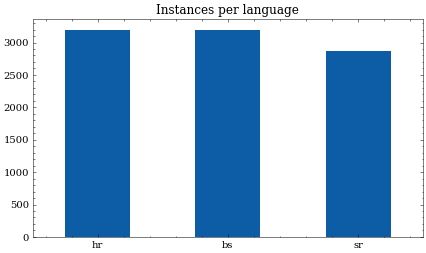

In [35]:
plt.figure(figsize=(7, 4))
df.labels.value_counts().plot(kind="bar")
plt.title("Instances per language")
plt.gca().tick_params(axis="x", rotation=0)

plt.savefig("/home/peterr/macocu/taskB/task4/setimes_dataset/images/instances_per_language.png")

In [36]:
df["length"] = df.text.apply(len)

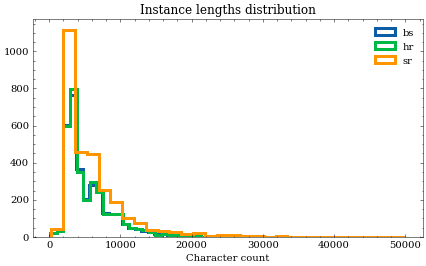

In [37]:
plt.figure(figsize=(7, 4))
for lang in df.labels.unique():
    plt.hist(df.loc[df.labels == lang, "length"].values, histtype="step", label=lang, lw=3, bins=30 )
plt.xlabel("Character count")
plt.legend()
plt.title("Instance lengths distribution")
plt.savefig("/home/peterr/macocu/taskB/task4/setimes_dataset/images/distributions.png")

In [38]:
df.shape

(9258, 4)

In [62]:

df.drop(columns="length"
    ).rename(columns={"labels":"language"}
    ).to_json("/home/peterr/macocu/taskB/task4/setimes_dataset/SETimes.json",
orient="records", indent=4,

)

# Twitter dataset:

In [21]:
import pickle
import matplotlib.pyplot as plt
plt.style.use("science,no-latex".split(","))
import pandas as pd
with open("../data/final/twitter_full_ds.pickle", "rb") as f:
    ds = pickle.load(f)

In [22]:
data = list()
for user in ds.keys():
    lang = ds[user]["language"]
    data.append(
        {
            "user": user,
            "language": lang,
            "tweets": [i for i in ds.get(user).get("tweets")]
        }
    )
import re
df = pd.DataFrame(data=data)
df["tweets"] = df.tweets.apply(lambda l: [re.sub('\s+', ' ', s) for s in l]).apply(lambda l: [s for s in l if s != " "])

df.head()

,user,language,tweets
0,LeoVinkovic,hr,"[ Hahahaha! i ja iz pera Sjajno! , Kruha & Iga..."
1,Vanjuus,sr,[Like it. Jureći ljubav. Novi singl Goribora. ...
2,Mracness,sr,"[Ali nije mi ... Hvala , Mrzim kad mi neko kaž..."
3,MilenaMina1,sr,"[Today stats: 36 followers, 2 unfollowers and ..."
4,JeremicJeremic,sr,"[4 leka koja treba da koristim za uho,ah, a j..."


In [23]:
re.sub('\s+', ' ', "'Kruha & Igara' «     via ",)

"'Kruha & Igara' « via "

In [24]:
df.iloc[0, 2]

[' Hahahaha! i ja iz pera Sjajno! ',
 'Kruha & Igara, plakat koji sam dizajnirao za portal ',
 "'Kruha & Igara' « via ",
 '"Habitat Pet Kindergarden Visual Identity", a project on :: ',
 'Novi vizualni identitet je u portfoliju. "Habitat Pet Kindergarden Visual Identity", a project on :: ',
 '"Inchoo Visual Identity Redesign", a project on :: ',
 ' hvala ti Luka :)',
 ' thx Boris :)',
 'Portal Dizajn svaki dan napravio je intervju samnom. Hvala Mihaelu i ekipi na tome. ',
 'Leo Vinković: dobar dizajn je inovativan, zanimljiv i funkcionalan | Dizajn svaki dan: ',
 ' Awesome package design for Honey products by ',
 ' hvala Tomislave :)',
 'Nakon Notcota, TheDielinea i mnogih drugih, Radosevic med objavljen je i na Student Show-u ',
 'Check out my entry to \'s competition "Wacom Talent Audition": ',
 ' Danas jedan osječki za i ',
 'Check out new work on my portfolio: "Špela-Sub" ',
 ' publish my Honey Package design for Radosevic. ',
 '"Daria & Ivan Wedding identity and invitations", a pr

In [25]:
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(df, stratify = df.language, random_state=42, train_size=0.6)
dev, test = train_test_split(devtest, stratify=devtest.language, random_state=42, train_size=0.5)

for subset in [dev, train, test, df]:
    subset["count"] = subset.tweets.apply(lambda l: sum([len(i) for i in l]))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<ipython-input-25-101f519f1ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["count"] = s

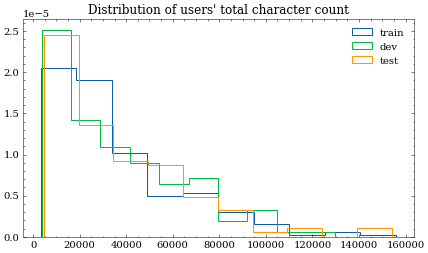

In [26]:
plt.figure(figsize=(7,4))

for name, subset in zip(["train", "dev", "test"],[train, dev, test]):
    plt.hist(subset["count"],
            label=f"{name}", histtype="step", density=True)

plt.title("Distribution of users' total character count")
plt.legend()
plt.savefig("twitter_dataset/images/users_length_distribution.png")

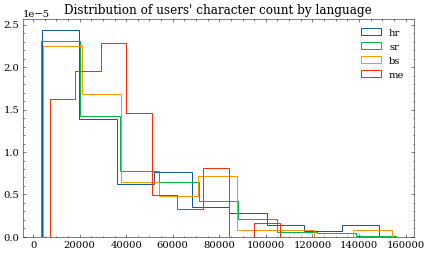

In [27]:
plt.figure(figsize=(7,4))

for lang in df.language.unique():
    subset = df.loc[df.language==lang, "count"]
    plt.hist(subset, label=f"{lang}", density=True, histtype="step", bins=9)

plt.title("Distribution of users' character count by language")
plt.legend()
plt.savefig("twitter_dataset/images/language_length_distribution.png")

In [28]:
for name, subset in zip(["train", "dev", "test"],[train, dev, test]):
    subset["split"] = name

<ipython-input-28-58645e1fb4f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["split"] = name


In [29]:
df_out = pd.concat([train, dev, test], ignore_index=True)

df_out.head()

,user,language,tweets,count,split
0,danijelzv,bs,"[ Isto srce kao '95! , ne otkrivaj nam položa...",59097,train
1,SavkaGazivoda,me,[ hahhahahahahahaha mogao si danas i iza nije ...,49024,train
2,psiha_je_cudo,sr,"[ moguce i to, ne znam, samo predpostavljan, ...",60548,train
3,ubuntu_hr,hr,"[Objavljen je 13.04 ( Ringtail) , Linux za Sv...",11454,train
4,mladisuzakon,sr,[Konkurs za volontera/volonterku | Fondacija A...,28879,train


In [30]:
df_out.loc[:, ["user", "language", "split", "tweets"]].to_json("twitter_dataset/twitter.json", orient="records", indent=4,)

In [8]:
import pandas as pd
df  = pd.read_json("twitter_dataset/twitter.json", orient="index")

In [12]:
print(df.language.value_counts().to_markdown())

|    |   language |
|:---|-----------:|
| sr |        394 |
| hr |         89 |
| bs |         75 |
| me |         56 |


In [20]:
print(df.head(2).to_json(orient="records", indent=4))

[
    {
        "user":"danijelzv",
        "language":"bs",
        "split":"train",
        "tweets":[
            " Isto srce kao '95! ",
            " ne otkrivaj nam polo\u017eaj :-)",
            " Savi\u0107eva je podsjetila da je ova fabrika, prije nego \u0161to je preuzela Vlada Srpske, bila na korak od zatvaranja.... http:",
            " Savi\u0107: PDP nema konkretne programe i manipuli\u0161e javno\u0161\u0107u ",
            " Zvorni\u010dki kotli\u0107, Zorana Pavi\u0107 i Bioskop na otvorenom tre\u0107i dan Zvorni\u010dkog ljeta via ",
            " Boro Lajthajm pobjednik Memorijalnog \u0161ahovskog turnira \"Boro Vukajlovi\u0107\" ",
            " Cestitam vam jos jednu titulu Tole super lige . Do sada je bar manje ocigledno namestao. ",
            " Zvezda da do\u010deka septembar u Evropi, pa neka pi\u0161e saop\u0161tenja. ",
            " Govnima iz Humske, odgovaraju saopstenjem govna iz Ljutice Bogdana. Pa, istupite iz takmicenja, seronje!",
            " \"Zvo